In [18]:
from torchvision import datasets
import numpy as np
import torch
import matplotlib.pyplot as plt
np.random.seed(8681)
torch.manual_seed(8681)

train_dataset = datasets.FashionMNIST(root= './data', train=True,download=True)
test_dataset = datasets.FashionMNIST(root= './data', train=False,download=True)

print(train_dataset.data.shape, test_dataset.data.shape)


torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [16]:
num_classes = 10
X_train = train_dataset.data.numpy().reshape(-1, 28 * 28).astype(
'float32' ) / 255.0
Y_train = train_dataset.targets.numpy()

X_test = test_dataset.data.numpy().reshape(-1, 28 * 28).astype(
'float32' ) / 255.0
Y_test = test_dataset.targets.numpy()


# Split the training set into train and validation sets (80% /20%)
validation_size = int(0.2 * X_train.shape[0])
X_validation, Y_validation = X_train[:validation_size], Y_train[:validation_size]
X_train, Y_train = X_train[validation_size:], Y_train[validation_size:]



(784,)
(48000, 784)
[6 4 1 0 0 5 7 5 4 0]


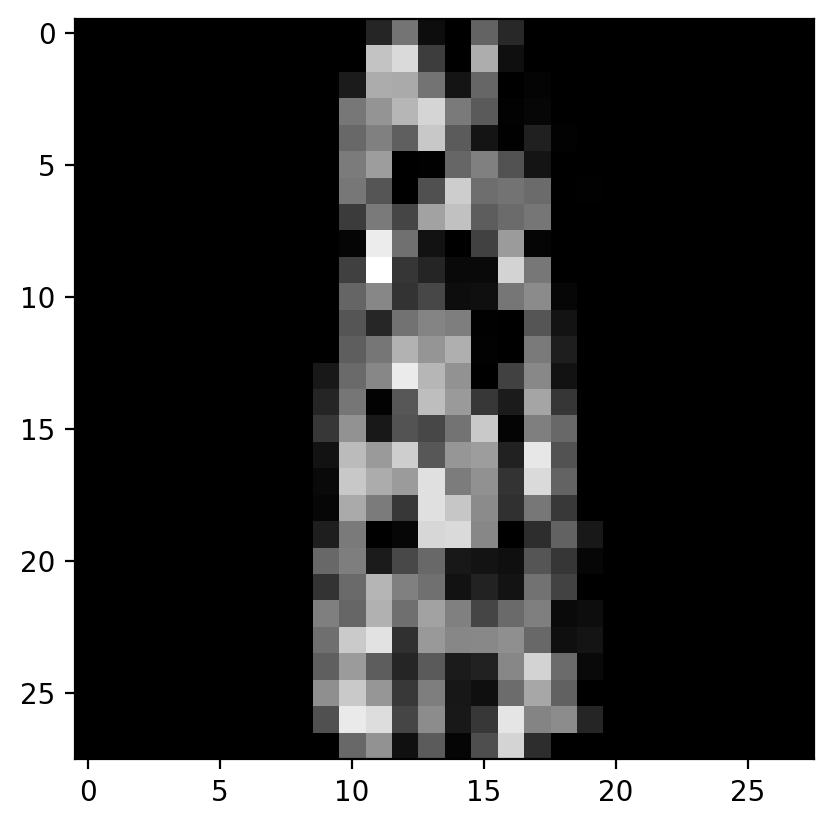

In [28]:
print(X_train[0].shape)
print(X_train.shape)
# print(Y_train_orig[:10])
print(Y_train[:10])
plt.imshow(X_train[10].reshape(28,28), cmap='Greys_r')


In [30]:
# Save original labels before one-hot encoding
Y_train_orig = Y_train
Y_validation_orig = Y_validation
Y_test_orig = Y_test
# Convert labels to one-hot encoding for multi-class classification
def one_hot_encode(labels, num_classes):
  return np.eye(num_classes)[labels]

Y_train = one_hot_encode(Y_train, num_classes)
Y_validation = one_hot_encode(Y_validation, num_classes)
Y_test = one_hot_encode(Y_test, num_classes)
# Calculate the mean and standard deviation of the training features
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train_std[X_train_std == 0] = 1  # To avoid division by zero
# Standardize all three subsets of data
X_train = (X_train - X_train_mean) / X_train_std
X_validation = (X_validation - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

In [ ]:
print(X_train.shape)
# print(X_train[:10])
# print(X_train[0])
# plt.imshow(X_train[3].reshape(28,28), cmap='Greys_r')
# print(X_train_mean)
# print(X_train_std)

batch_size = 64
mini_batches = [X_train[i:i + batch_size] for i in range(0, X_train.shape[0], batch_size)]
len(mini_batches), mini_batches[0].shape
print(mini_batches[63].shape)





(48000, 784)
(64, 784)


In [ ]:
#experiment forward pass one sample first
print(mini_batches[0].shape)
print(X_train_mean.shape)
#first hidden layer 128 units
w_1 = np.random.uniform(-0.5, 0.5, 156)
b_1 = np.zeros(156)



#second hidden layer 64 units
w_2 = np.random.uniform(-0.5, 0.5, 64)
b_2 = np.zeros(64)
#output layer 10 units


(64, 784)
(784,)
